# Noise Reduction

## Imports

In [68]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
from numpy import fft
from matplotlib import pyplot as plt

## Reading Noisy File

In [80]:
fs, noisy = wavfile.read('res/soundCA2.wav')

## Finding Noise Frequency

In [175]:
def plot_signal(x, fs, title=""):
    def nextpow2(x):
        return (x - 1).bit_length()

    L = len(x)
    NFFT = 2 ** nextpow2(L) # Next power of 2 from length of x
    X = fft.fft(x, n=NFFT)
    X_abs = 2 * np.absolute(X) / L
    half = int(NFFT/2)
    freq = fft.fftfreq(NFFT, d=1/fs)
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(title)
    ax[0].plot(freq[:half], X_abs[:half])
    ax[0].set_title('Single-Sided Amplitude Spectrum of x(t)')
    ax[0].set_xlabel('Frequency [Hz]')
    ax[0].set_ylabel('|X(f)|')
    ax[0].grid()
    ax[1].plot(x)
    ax[1].set_title('x(t)')
    ax[1].set_xlabel('t')
    ax[1].set_ylabel('x(t)')
    ax[1].grid()
    plt.show()
    return (freq[np.argmax(X_abs[:half])])


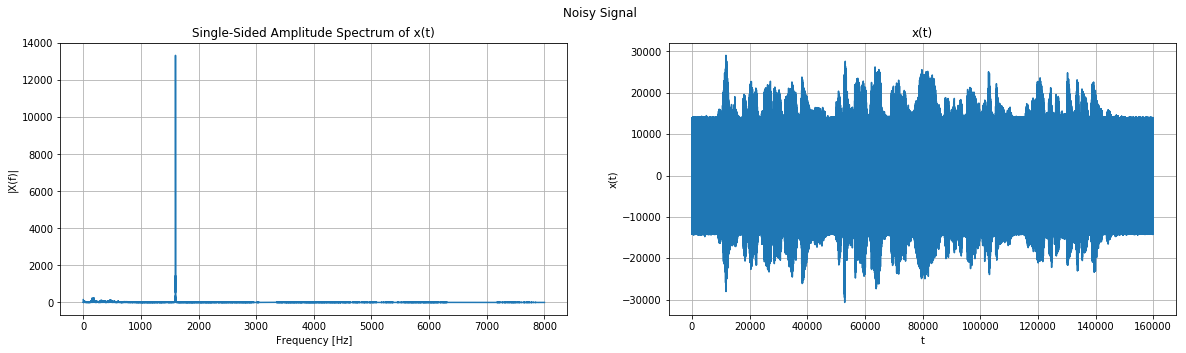

Noise is in 1599.976Hz


In [176]:
noise_f = plot_signal(noisy, fs, "Noisy Signal")
print("Noise is in %.3fHz" % noise_f)

## Removing Noise

In [163]:
def butter_bandstop_filter(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandstop')
    return b, a


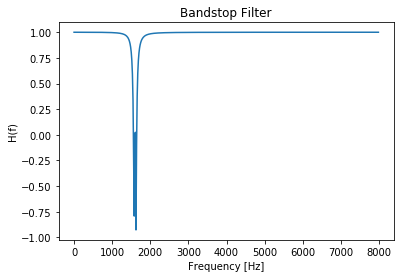

In [212]:
noise_length = 20
filter = butter_bandstop_filter(noise_f - noise_length, noise_f + noise_length, fs)
plt.plot(*signal.freqz(*filter, fs=fs))
plt.title('Bandstop Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('H(f)')
plt.show()

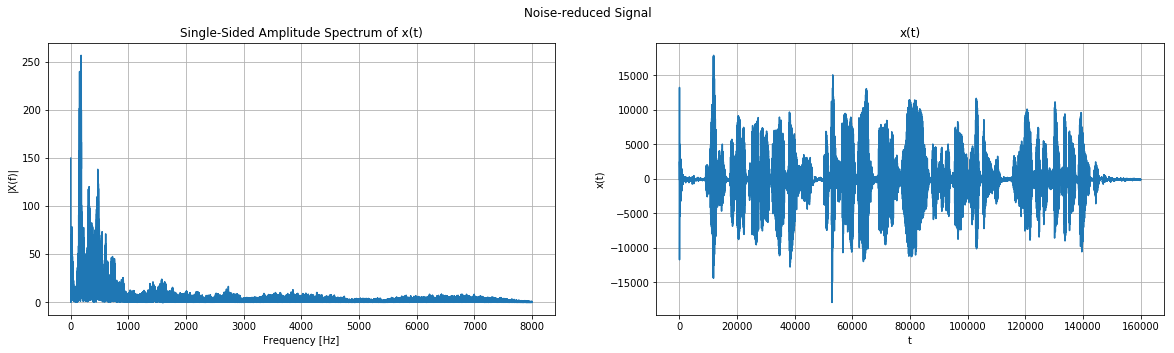

In [220]:
noise_reduced = signal.lfilter(*filter, noisy).astype(np.int16)
_ = plot_signal(noise_reduced, fs, "Noise-reduced Signal")

## Writing Noise-reduced Signal

In [222]:
wavfile.write('res/noiseless.wav', fs, noise_reduced)

In [224]:
import IPython
IPython.display.Audio('res/noiseless.wav')